In [90]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('data/winequality-red.csv')

In [91]:
# Display info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [92]:
# Display first few rows of data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
# Check for missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [94]:
# Remove duplicate data
data.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


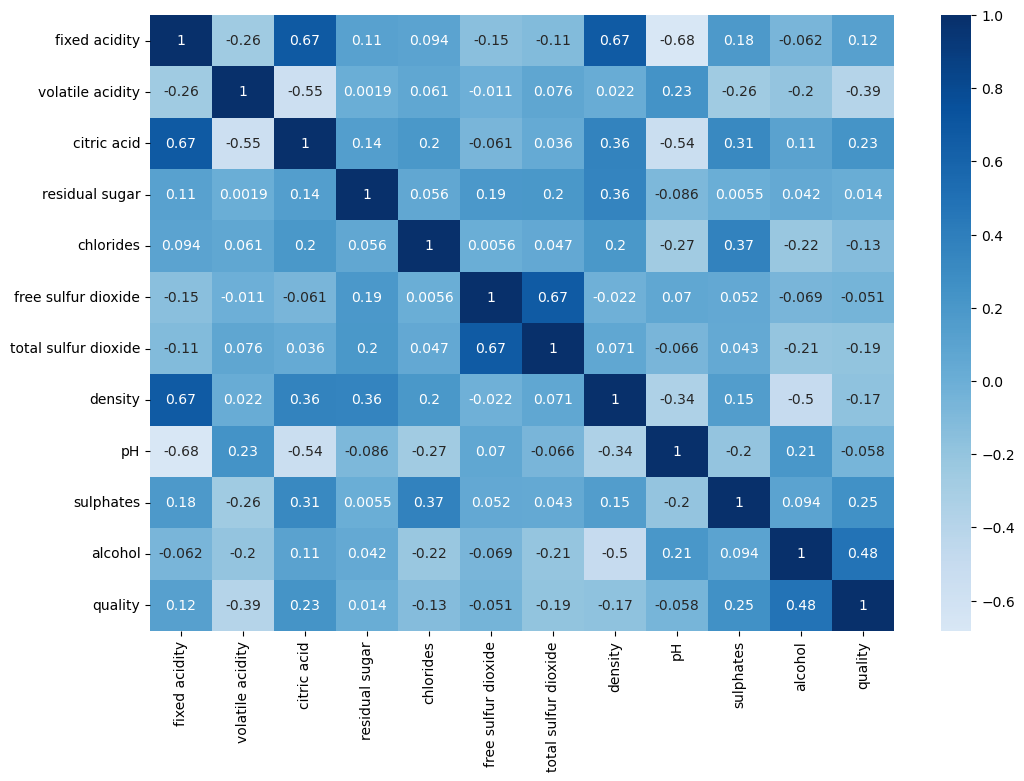

In [95]:
# Correlation matrix
# Calculate the correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr_matrix, center=0, cmap='Blues',annot=True)
# plt.savefig("figures/correlation_matrix.png", dpi=300)
plt.show()

<b>TODO 1: Discuss how Figure 2 can be used to gain insights into the features that most influence the wine quality and to identify highly correlated features</b>

To identify features that most influence wine quality, you can look for the rows or columns with high absolute correlation values with respect to the target variable "quality". These features are likely to have a strong linear relationship with wine quality and may be good predictors of it.

From the figure, we can see that alcohol has the highest positive correlation with quality (0.48), while volatile acidity has the highest negative correlation with quality (-0.39). This suggests that alcohol content is likely to be an important factor in determining wine quality, while high levels of volatile acidity may negatively impact wine quality.






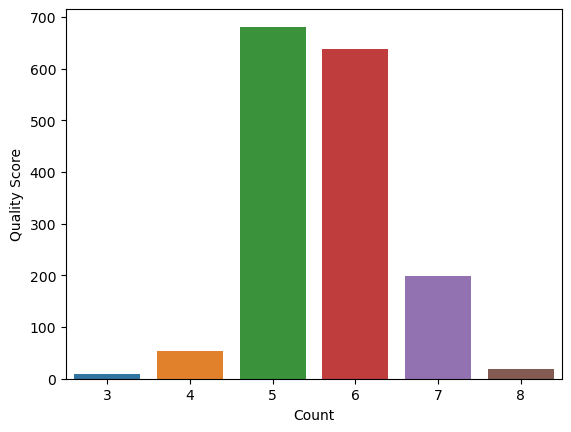

In [96]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x='quality')
plt.xlabel('Count')
plt.ylabel('Quality Score')
# plt.savefig("figures/wine_quality_distribution.png", dpi=300)
plt.show()

In [97]:
# Label quality into Good (1) and Bad (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6.0 else 0)

# Display dataframe
data.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


([<matplotlib.axis.XTick at 0x20e75033808>,
 [Text(0, 0, 'Bad'), Text(1, 0, 'Good')])

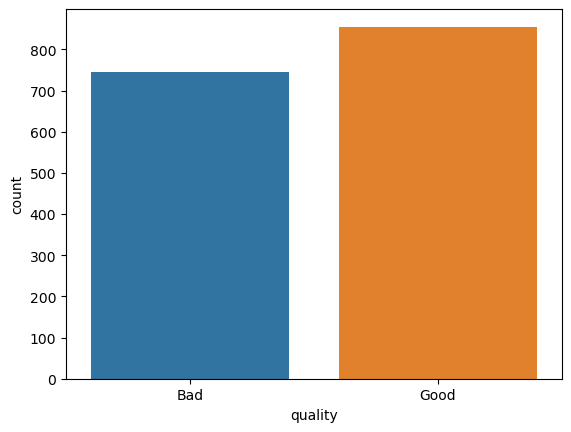

In [98]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x='quality')
plt.xticks([0, 1], ['Bad', 'Good'])

In [99]:
# Get distinc count of quality
quality_count = data['quality'].value_counts()
quality_count

1    855
0    744
Name: quality, dtype: int64

In [100]:
# Drop the target variable
X = data.drop('quality', axis=1)
# Set the target variable as the label
y = data['quality']

In [101]:
# Display shape
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [102]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Select the top 5 features using SelectKBest
# kbest = SelectKBest(score_func=f_classif, k=5)
# X_new = kbest.fit_transform(X, y)

# # Print the selected features
# print(X.columns[kbest.get_support()])

# # Reassign the selected features to X
# X = X[X.columns[kbest.get_support()]]

In [103]:
from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

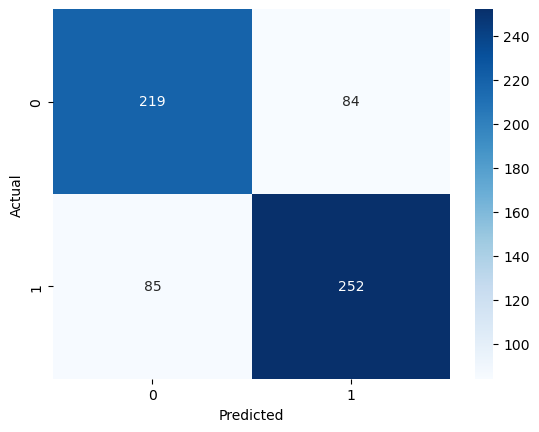

In [105]:
# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig("figures/confusion_matrix.png", dpi=300)
plt.show()

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision of the model
precision = precision_score(y_test, y_pred)

# Compute the recall of the model
recall = recall_score(y_test, y_pred)

# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7359375
Precision: 0.75
Recall: 0.7477744807121661
F1 score: 0.7488855869242198


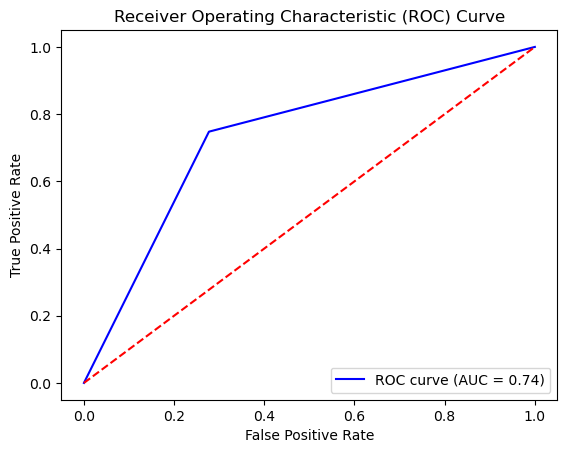

In [107]:
# Import relevant libraries
from sklearn.metrics import roc_curve, roc_auc_score

# y_true and y_score are the true labels and predicted scores, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig("figures/roc_curve.png", dpi=300)
plt.show()

<b>TODO 2: What is the most appropriate performance metric to evaluate the model’s performance?
Briefly explain why</b>

Accuracy,

In the case of the wine quality dataset, where we are predicting whether a wine is "Good" or "Bad", a suitable performance metric could be accuracy, which measures the proportion of correctly classified instances out of all instances. 

Accuracy is a good metric for binary classification problems like this because it provides a simple and intuitive measure of how well the model is performing overall. However, it may not be appropriate if there is an imbalance in the class distribution or if false positives and false negatives have different costs or consequences.


<b>TODO 3: Eliminate irrelevant features that may negatively affect the performance of the model and
discuss how that may affect the model’s performance using your chosen metric.</b>


In logistic regression, irrelevant features can lead to overfitting, which means that the model is too complex and fits the training data too closely, resulting in poor generalization to new data. By eliminating irrelevant features, we can reduce overfitting and improve the model's ability to generalize to new data.


<b>TODO 4: Try different test/train split ratios and evaluate the model performance in terms of your
chosen metric to find the optimal split ratio.</b>
10% 
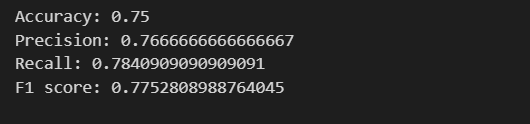

20% 
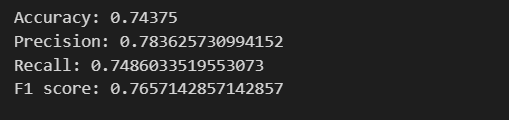

30% 
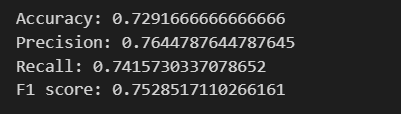

40% 
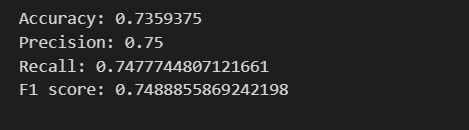


| Test Split  | Description |
| ----------- | ----------- |
| 0.1      | 0.75   |
| 0.2   | 0.74375     |
| 0.3      | 0.7291  |
| 0.4   | 0.7359       |

<b>TODO 5: Perform hyperparameter tuning for the logistic regression model using grid search to optimize
the model’s performance with the dataset. Try different hyperparameters, such as C (regularization
strength), penalty (regularization type), solver (optimization algorithm), and max iter (maximum
number of iterations to converge). Compare the results with our initial model and choose the best set
of hyperparameters.</b>


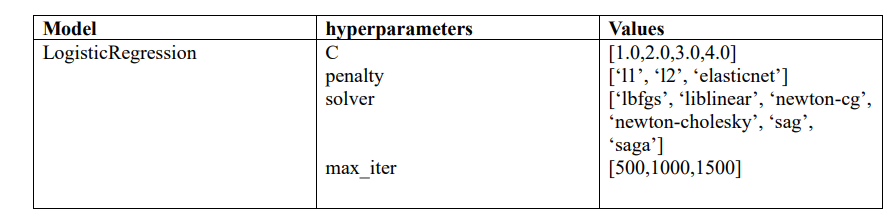


The best set of hyperparameters obtained : {'C': 3.0, 'max_iter': 500, 'penalty': 'l2', 'solver':'lbfgs'}
accuracy : 0.7178033088235294


In [108]:
# Create the Dash app
# external_stylesheets = ['https://fonts.googleapis.com/css2?family=Open+Sans&display=swap']

app = dash.Dash(__name__)
# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# Define the layout of the dashboard
app.layout = html.Div(
#     style={'font-family': 'Open Sans'}, 
    children=[
    
    html.H1('CO544-2023 Lab 3: Wine Quality Prediction'),
    
    html.Div([
        html.H3('Exploratory Data Analysis'),
        html.Label('Feature 1 (X-axis)'),
        dcc.Dropdown(
            id='x_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[0]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    
    html.Div([
        html.Label('Feature 2 (Y-axis)'),
        dcc.Dropdown(
            id='y_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[1]
        )
    ], style={'width': '30%', 'display': 'inline-block'}),
    
    dcc.Graph(id='correlation_plot'),
    
    # Wine quality prediction based on input feature values
    html.H3("Wine Quality Prediction"),
    html.Div([
        html.Label("Fixed Acidity"),
        dcc.Input(id='fixed_acidity', type='number', required=True),    
        html.Label("Volatile Acidity"),
        dcc.Input(id='volatile_acidity', type='number', required=True), 
        html.Label("Citric Acid"),
        dcc.Input(id='citric_acid', type='number', required=True),
        html.Br(),
        
        html.Label("Residual Sugar"),
        dcc.Input(id='residual_sugar', type='number', required=True),  
        html.Label("Chlorides"),
        dcc.Input(id='chlorides', type='number', required=True), 
        html.Label("Free Sulfur Dioxide"),
        dcc.Input(id='free_sulfur_dioxide', type='number', required=True),
        html.Br(),
        
        html.Label("Total Sulfur Dioxide"),
        dcc.Input(id='total_sulfur_dioxide', type='number', required=True),
        html.Label("Density"),
        dcc.Input(id='density', type='number', required=True),
        html.Label("pH"),
        dcc.Input(id='ph', type='number', required=True),
        html.Br(),
        
        html.Label("Sulphates"),
        dcc.Input(id='sulphates', type='number', required=True),
        html.Label("Alcohol"),
        dcc.Input(id='alcohol', type='number', required=True),
        html.Br(),
    ]),

    html.Div([
        html.Button('Predict', id='predict-button', n_clicks=0),
    ]),

    html.Div([
        html.H4("Predicted Quality"),
        html.Div(id='prediction-output')
    ])
])

# Define the callback to update the correlation plot
@app.callback(
    dash.dependencies.Output('correlation_plot', 'figure'),
    [dash.dependencies.Input('x_feature', 'value'),
     dash.dependencies.Input('y_feature', 'value')]
)
def update_correlation_plot(x_feature, y_feature):
    fig = px.scatter(data, x=x_feature, y=y_feature, color='quality')
    fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
    return fig

# Define the callback function to predict wine quality
@app.callback(
    Output(component_id='prediction-output', component_property='children'),
    [Input('predict-button', 'n_clicks')],
    [State('fixed_acidity', 'value'),
     State('volatile_acidity', 'value'),
     State('citric_acid', 'value'),
     State('residual_sugar', 'value'),
     State('chlorides', 'value'),
     State('free_sulfur_dioxide', 'value'),
     State('total_sulfur_dioxide', 'value'),
     State('density', 'value'),
     State('ph', 'value'),
     State('sulphates', 'value'),
     State('alcohol', 'value')]
)
def predict_quality(n_clicks, fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                     chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol):
    # Create input features array for prediction
    input_features = np.array([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, 
                               free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol]).reshape(1, -1)

    # Predict the wine quality (0 = bad, 1 = good)
    prediction = logreg_model.predict(input_features)[0]

    # Return the prediction
    if prediction == 1:
        return 'This wine is predicted to be good quality.'
    else:
        return 'This wine is predicted to be bad quality.'


if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


In [ ]:
# sample_data = [9.1, 0.4, 0.5, 1.8, 0.071, 7.0, 16.0, 0.9946, 3.21, 0.69, 12.5]])